In [2]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# 　

## [ CNN 학습모델 빌드하기 ]

In [4]:
#dataset https://www.kaggle.com/tongpython/cat-and-dog

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rootPath = './input/cat-and-dog/training_set'
rootPath2 = './input/cat-and-dog/test_set'

In [5]:
imageGenerator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    brightness_range=[.2,.2],
                                    horizontal_flip=True,
                                    validation_split=.1)

In [6]:
# 데이터를 분할하기 위한 코드
trainGen = imageGenerator.flow_from_directory(os.path.join(rootPath,'training_set'),
                                              target_size=(64,64),
                                              subset='training')

validationGen = imageGenerator.flow_from_directory(os.path.join(rootPath,'training_set'),
                                                  target_size=(64,64),
                                                  subset='validation')

Found 7205 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [7]:
# 모델 설정을 위한 import
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

In [8]:
# inputlayer와 conv 설정하기 위한 코드
model.add(layers.InputLayer(input_shape=(64,64,3)))
model.add(layers.Conv2D(16,(3,3),(1,1),'same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [10]:
# model 컴파일을 하기 위한 코드
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['acc'],
)

In [11]:
# 모델 학습을 실행하기 위한 코드
epochs = 32
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/32
225/225 [==============================] - 80s 351ms/step - loss: 0.6929 - acc: 0.5038 - val_loss: 0.6822 - val_acc: 0.5387
Epoch 2/32
225/225 [==============================] - 73s 326ms/step - loss: 0.6826 - acc: 0.5663
Epoch 3/32
225/225 [==============================] - 73s 325ms/step - loss: 0.6612 - acc: 0.6111
Epoch 4/32
225/225 [==============================] - 73s 325ms/step - loss: 0.6406 - acc: 0.6365
Epoch 5/32
225/225 [==============================] - 73s 323ms/step - loss: 0.6245 - acc: 0.6537
Epoch 6/32
225/225 [==============================] - 73s 324ms/step - loss: 0.6061 - acc: 0.6637
Epoch 7/32
225/225 [==============================] - 74s 326ms/step - loss: 0.5900 - acc: 0.6837
Epoch 8/32
225/225 [==============================] - 74s 329ms/step - loss: 0.5836 - acc: 0.6844
Epoch 9/32
225/225 [==============================] - 74s 326ms/step - loss: 0.5763 - acc: 0.6927
Epoch 10/32
225/225 [==============================] - 73s 324ms/step - loss: 0.5

#### 　

## [ CNN 학습 모델 평가하기 ]

ValueError: x and y must have same first dimension, but have shapes (32,) and (1,)

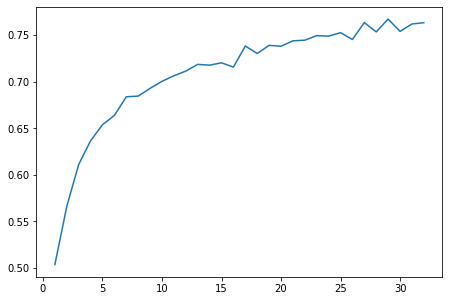

In [26]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 2))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, label='Training accuracy')
    plt.plot(epochs, val_accuracy, label='Validation accuracy')
    plt.title('Trainging and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()
    
show_graph(history.history)

In [19]:
# 테스트 데이터를 이용하여 추론하기 위한 코드
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath2, 'test_set'),
    target_size=(64, 64), )

model.evaluate_generator(testGen)

Found 2023 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.4800868630409241, 0.7637172341346741]

AttributeError: 'Sequential' object has no attribute 'predict_classes'

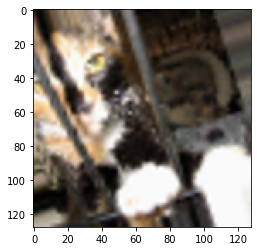

In [28]:
# [샘플1] 실제 예측이 되는지 비교하기 위한 코드
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['고양이', '개']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))

AttributeError: 'Sequential' object has no attribute 'predict_classes'

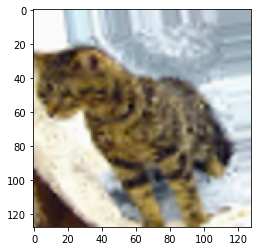

In [22]:
# [샘플2]
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['고양이', '개']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))

AttributeError: 'Sequential' object has no attribute 'predict_classes'

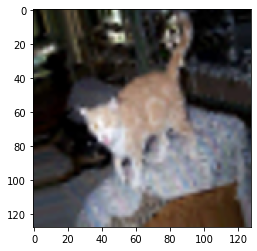

In [23]:
# [샘플3] 테스트
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['고양이', '개']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))

AttributeError: 'Sequential' object has no attribute 'predict_classes'

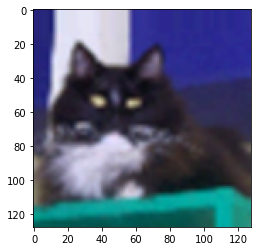

In [24]:
# [샘플4] 테스트
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['고양이', '개']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))